# The Good Place – Exploratory Data Analysis

# Introduction

In this notebook presents an exploratory data analysis (EDA) project based on episode-level information from the television series **The Good Place** bold text, using two datasets from IMDB. The goal is to combine, clean, and explore the data to find useful insights about viewer trends, ratings, and episode structure.

The main goal is to **combine, clean, and explore** the data to uncover useful insights about:
- Viewer trends
- IMDb ratings
- Episode structure
- Contributions by writers and directors

## Datasets Used

This project works with two CSV files:

### 1. `the_good_place_imdb.csv`

### which contains of :

- `season`: Season number  
- `episode_num`: Episode number within the season  
- `title`: Episode title (from IMDb)  
- `original_air_date`: Air date (may differ in formatting)  
- `imdb_rating`: IMDb user rating (1–10)  
- `total_votes`: Number of user votes on IMDb  
- `desc`: Short episode description

### 2. `the_good_place_episodes.csv`

This dataset includes episode metadata such as titles, creators, and US viewership:

- `season`: Season number (initially stored as a float)
- `episode_num_in_season`: Episode number within the season
- `episode_num_overall`: Episode number across the entire series
- `title`: Episode title (from production data)
- `directed_by`: Name(s) of the episode’s director(s)
- `written_by`: Name(s) of the episode’s writer(s)
- `original_air_date`: Air date (may differ from IMDb)
- `us_viewers`: Number of viewers in the US (in millions)


## Project Objective is:

The goal of this project is to perform a structured and detailed Exploratory Data Analysis (EDA) on episode-level data from *The Good Place*.  

By combining data from IMDb and production sources, we want to:

- Understand how the show was received across seasons
- Analyze trends in ratings, votes, and viewership
- Identify top-performing episodes
- Explore the roles of writers and directors
- Handle data inconsistencies and prepare the dataset for analysis

## Data location and Loading Method

The datasets used in this project were stored on Google Drive. I accessed and downloaded them directly into the notebook using the `wget` command with the appropriate file IDs and export links.

This allowed the CSV files to be saved locally and loaded into pandas DataFrames for analysis.

### Files Downloaded:

- `the_good_place_imdb.csv`: Contains IMDb ratings, votes, titles, air dates, and descriptions

https://drive.google.com/file/d/1B5UZoBR4Cy0eEoxJveuczZUWxDxjd9nP/view?usp=sharing

- `the_good_place_episodes.csv`: Contains episode metadata such as writers, directors, air dates, and US viewership

https://drive.google.com/file/d/1g5OtAjkW_Vvcd60DvKPlJY35r4x3EJ_B/view?usp=sharing

### Next Steps:
- Import essential Python libraries
- Load the datasets into `imdb_df` and `episodes_df`
- Begin data inspection and preparation

## First step : preparing the Working Environment by importing the necessary libraries

- Importing necessary Python libraries, then
- Load both datasets and then
- see the data in them and somehow to understand their structure and what to do with them as instructed

In [1]:
#step 1 importing the necessary libraries

import pandas as pd               # For data manipulation
import numpy as np                # For visualization
import matplotlib.pyplot as plt   # For enhanced plots
import seaborn as sns             # For numerical operations

- `pandas` for data handling
- `numpy` for numerical support
- `matplotlib` and `seaborn` for plotting and data visualization

### Downloading the Data with wget

#### Google Drive File IDs:

1. **Episodes Dataset**  
   ID: `1B5UZoBR4Cy0eEoxJveuczZUWxDxjd9nP`

2. **IMDb Ratings Dataset**  
   ID: `1g5OtAjkW_Vvcd60DvKPlJY35r4x3EJ_B`

In [2]:
# Download "The Good Place - Episodes"
!wget "https://drive.google.com/uc?export=download&id=1B5UZoBR4Cy0eEoxJveuczZUWxDxjd9nP" -O the_good_place_episodes.csv

# Download "The Good Place - IMDB"
!wget "https://drive.google.com/uc?export=download&id=1g5OtAjkW_Vvcd60DvKPlJY35r4x3EJ_B" -O the_good_place_imdb.csv


--2025-05-08 18:15:09--  https://drive.google.com/uc?export=download&id=1B5UZoBR4Cy0eEoxJveuczZUWxDxjd9nP
Resolving drive.google.com (drive.google.com)... 142.250.98.101, 142.250.98.100, 142.250.98.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1B5UZoBR4Cy0eEoxJveuczZUWxDxjd9nP&export=download [following]
--2025-05-08 18:15:09--  https://drive.usercontent.google.com/download?id=1B5UZoBR4Cy0eEoxJveuczZUWxDxjd9nP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4260 (4.2K) [application/octet-stream]
Saving to: ‘the_good_place_episodes.csv’

the_good_place_epis 100%[===================>]   4.16K

## Loading the Datasets


After downloading the datasets from Google Drive, I loaded them into two **pandas DataFrames** using the **pd.read_csv()** function:

* **imdb_df** contains episode information such as title, IMDB rating, air date, and vote count.

* episodes_df contains production-related details such as writers, directors, and US viewership.

To get a quick look at the structure of both datasets, I used the **.head()** function to display the first 5 rows of each.

In [3]:
# Loading the CSV files
imdb_df = pd.read_csv("the_good_place_imdb.csv")
episodes_df = pd.read_csv("the_good_place_episodes.csv")

In [4]:
# Display the first 5 rows of each dataframe
print("IMDB Data:")
display(imdb_df.head())

print("Episodes Data:")
display(episodes_df.head())

IMDB Data:


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2016-09-19,8.0,3687,Newly-deceased Eleanor Shellstrop is sent to t...
1,1,2,Flying,2016-09-19,7.6,3242,Eleanor tries to prove to Chidi that she's wor...
2,1,3,Tahani Al-Jamil,2016-09-22,8.0,3073,Chidi starts giving Eleanor formal lessons in ...
3,1,4,Jason Mendoza,2016-09-29,7.9,2934,Eleanor has a hard time remaining hidden; Mich...
4,1,5,Category 55 Emergency Doomsday Crisis,2016-10-06,8.0,2823,Teaching Eleanor about ethics becomes a full-t...


Episodes Data:


,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1.0,1,1,Pilot,Drew Goddard,Michael Schur,2016-09-19,8040000.0
1,1.0,2,2,Flying,Michael McDonald,Alan Yang,2016-09-19,8040000.0
2,1.0,3,3,Tahani Al-Jamil,Beth McCarthy-Miller,Aisha Muharrar,2016-09-22,5250000.0
3,1.0,4,4,Jason Mendoza,Payman Benz,Joe Mande,2016-09-29,4450000.0
4,1.0,5,5,Category 55 Emergency Doomsday Crisis,Morgan Sackett,Matt Murray,2016-10-06,4970000.0


## Findings from the both datasets above :

1. **Data Type Mismatch in `season`:**  
   - IMDb: `season` is an **integer** (e.g., `1`)  
   - Episodes dataset: `season` is a **float** (e.g., `1.0`)  
   *Solution:* Convert `season` in the Episodes dataset to integer for consistency.

2. **Episode Number Column Naming:**  
   - IMDb uses `episode_num`  
   - Episodes dataset uses `episode_num_in_season`  
   *Solution:* Standardize the column names before merging (e.g., rename one to match the other).

3. **Presence of Overall Episode Number:**  
   - Available in Episodes dataset (`episode_num_overall`)  
   - Not present in IMDb dataset  
   *Solution:* Keep for reference, but do not use for merging.

4. **Differences in Title Formatting:**  
   - IMDb titles are often shorter and lowercase  
   - Episodes dataset titles are longer or more descriptive  
   *Solution:* We can standardize text formatting if needed, but this is optional.


This overview show us let us know that why data prepration is necessary and in this and case like this how we handleing them. **bold text**

In [5]:
#season in episodes to integer
episodes_df = episodes_df.dropna(subset=['season'])
episodes_df = episodes_df[~episodes_df['season'].isin([float('inf'), float('-inf')])]
episodes_df['season'] = episodes_df['season'].astype(int)

#'episode_num_in_season' to 'episode_num' for easier merging
episodes_df.rename(columns={'episode_num_in_season': 'episode_num'}, inplace=True)

In [6]:
# to see the result of previous step
print("IMDB Data:")
display(imdb_df.head())

print("Episodes Data:")
display(episodes_df.head())

IMDB Data:


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2016-09-19,8.0,3687,Newly-deceased Eleanor Shellstrop is sent to t...
1,1,2,Flying,2016-09-19,7.6,3242,Eleanor tries to prove to Chidi that she's wor...
2,1,3,Tahani Al-Jamil,2016-09-22,8.0,3073,Chidi starts giving Eleanor formal lessons in ...
3,1,4,Jason Mendoza,2016-09-29,7.9,2934,Eleanor has a hard time remaining hidden; Mich...
4,1,5,Category 55 Emergency Doomsday Crisis,2016-10-06,8.0,2823,Teaching Eleanor about ethics becomes a full-t...


Episodes Data:


,season,episode_num,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Drew Goddard,Michael Schur,2016-09-19,8040000.0
1,1,2,2,Flying,Michael McDonald,Alan Yang,2016-09-19,8040000.0
2,1,3,3,Tahani Al-Jamil,Beth McCarthy-Miller,Aisha Muharrar,2016-09-22,5250000.0
3,1,4,4,Jason Mendoza,Payman Benz,Joe Mande,2016-09-29,4450000.0
4,1,5,5,Category 55 Emergency Doomsday Crisis,Morgan Sackett,Matt Murray,2016-10-06,4970000.0


## Understanding the Structure of the Data

before we start anything we must analyzing and understanding

1. The columns we have
2. The data type we have
3. Is there any missing values?
4. any duplication
5. is there any overlapping or complementary informations?

## Dataset Structure with `.info()`

the `.info()` method to examine the basic structure of each dataset

The `.info()` provides a summary of:
- Column names
- Number of non-null values
- Data types for each column


### IMDB Dataset:

- have 50 rows and 7 columns
- All fields have values and no missing values
- The fields type are mostly int64, float64, or text

### Episodes Dataset:

- have 46 rows and 8 columns
- these fields us_viewers, original_air_date, directed_by, and written_by have missing value
- The fields type are integers, floats, and text

In [7]:
#IMDB DATASET INFO
print("IMDB Dataset Info:")
imdb_df.info()

#EPISODES DATASET INFO
print("\nEpisodes Dataset Info:")
episodes_df.info()

IMDB Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             50 non-null     int64  
 1   episode_num        50 non-null     int64  
 2   title              50 non-null     object 
 3   original_air_date  50 non-null     object 
 4   imdb_rating        50 non-null     float64
 5   total_votes        50 non-null     int64  
 6   desc               50 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ KB

Episodes Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 51
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               46 non-null     int64  
 1   episode_num          46 non-null     int64  
 2   episode_num_overall  46 non-null     int64  
 3   title    

## Missing Values Overview

### IMDb Dataset:
- No missing values in any column.
- All 50 records are fully complete.

### Episodes Dataset:
- The `us_viewers` column has **3 missing values**.
- All other columns currently appear to be complete.

In [8]:
print("Missing values/nulls in IMDB :")
print(imdb_df.isnull().sum())

print("\nMissing values/null in Episodes :")
print(episodes_df.isnull().sum())

Missing values/nulls in IMDB :
season               0
episode_num          0
title                0
original_air_date    0
imdb_rating          0
total_votes          0
desc                 0
dtype: int64

Missing values/null in Episodes :
season                 0
episode_num            0
episode_num_overall    0
title                  0
directed_by            0
written_by             0
original_air_date      0
us_viewers             3
dtype: int64


## Checking for Duplicate Rows

for this I checked both datasets for duplicate rows using the **.duplicated().sum()** method.

Results:
- **IMDb Dataset:** 0 duplicate rows
- **Episodes Dataset:** 0 duplicate rows

In [9]:
print("Duplicate rows in IMDB:", imdb_df.duplicated().sum())
print("Duplicate rows in Episodes:", episodes_df.duplicated().sum())

Duplicate rows in IMDB: 0
Duplicate rows in Episodes: 0


## Comparing Dataset Columns and Shapes

To see how many column and rows we have - shape
and is there any chance of merging or *matching*

### DataFrame Shapes:
- **IMDb Dataset:** 50 rows × 7 columns
- **Episodes Dataset:** 46 rows × 8 columns

The row mismatch shows that not all episodes are represented in both datasets.  


In [10]:
print("IMDB Columns:", imdb_df.columns.tolist())
print("Episodes Columns:", episodes_df.columns.tolist())

print("IMDB Shape:", imdb_df.shape)
print("Episodes Shape:", episodes_df.shape)

IMDB Columns: ['season', 'episode_num', 'title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']
Episodes Columns: ['season', 'episode_num', 'episode_num_overall', 'title', 'directed_by', 'written_by', 'original_air_date', 'us_viewers']
IMDB Shape: (50, 7)
Episodes Shape: (46, 8)


## Merging datasets Common Columns

Just by the look at it as we all know and have experices with movies and series and IMDB database we could say it has shared columns between them like (Season, episode, title, air date)

we just try to merge and see how things go out by the look of the output errors

**An outer merge on the common columns season and episode_num.**


In [11]:
# MERGING
merged = pd.merge(imdb_df, episodes_df, on=["season", "episode_num"], how="outer", suffixes=('_imdb', '_episodes'), indicator=True)

# Mergeing only season and episode_num
merged = pd.merge(imdb_df, episodes_df, on=["season", "episode_num"], how="outer",
             suffixes=('_imdb', '_episodes'), indicator=True)
# Check for mismatch
mismatched_titles = merged[merged['title_imdb'] != merged['title_episodes']]
print("If there is any mismatched titles:")
display(mismatched_titles[['season', 'episode_num', 'title_imdb', 'title_episodes']])

If there is any mismatched titles:


,season,episode_num,title_imdb,title_episodes
14,2,2,Dance Dance Resolution,Everything Is Great! Part 2
15,2,3,Team Cockroach,Dance Dance Resolution
16,2,4,Existential Crisis,Team Cockroach
17,2,5,The Trolley Problem,Existential Crisis
18,2,6,Janet and Michael,The Trolley Problem
19,2,7,Derek,Janet and Michael
20,2,8,Leap to Faith,NaN
21,2,9,Best Self,NaN
22,2,10,"Rhonda, Diana, Jake, and Trent",Best Self
23,2,11,The Burrito,"Rhonda, Diana, Jake, and Trent"


### The table below shows the rows where the episode titles from both datasets do not match:

- **Swapped or shifted titles:**  
  IMDb shows `"Dance Dance Resolution"`, but the Episodes dataset lists `"Everything Is Great Part 2"`

- **Possible typos or renaming differences:**  
  `"Existential Crisis"` appears out of sequence near `"The Trolley Problem"`

- **Missing titles in one dataset:**  
  Some records have `NaN` in either the IMDb or Episodes title column

### Episodes Missing in Episodes Dataset


After an outer merge, there are several episodes listed in the IMDb dataset do not appear in the production metadata dataset. These episodes have `NaN` values in fields such as `us_viewers`, `directed_by`, or `written_by`.

This suggests that the Episodes dataset is incomplete.

In [12]:
print(merged['_merge'].value_counts())

missing_episodes = merged[merged['_merge'] == 'left_only']
print("episodes in IMDB but missing in Episodes data:")
display(missing_episodes[['season', 'episode_num', 'title_imdb', 'original_air_date_imdb']])


_merge
both          44
left_only      6
right_only     2
Name: count, dtype: int64
episodes in IMDB but missing in Episodes data:


,season,episode_num,title_imdb,original_air_date_imdb
20,2,8,Leap to Faith,2018-01-04
21,2,9,Best Self,2018-01-11
28,3,3,The Snowplow,2018-10-11
29,3,4,Jeremy Bearimy,2018-10-18
30,3,5,The Ballad of Donkey Doug,2018-10-25
50,4,12,Patty,2020-01-23


### Merge Summary


- **44 episodes** matched in both datasets → `both`
- **6 episodes** found **only in IMDb** → `left_only`
- **2 episodes** found **only in the Episodes dataset** → `right_only`

These differences confirm that the datasets are not perfectly aligned.

### Example Episodes Found Only in IMDb:

- `"Leap to Faith"` – 2018-01-04  
- `"The Ballad of Donkey Doug"` – 2018-10-25  
- `"Patty"` – 2020-01-23

We used `right_only` from the merge indicator to filter the merged DataFrame and identify episodes that exist **only** in the Episodes dataset, but are **missing** from the IMDb dataset.


In [13]:
right_only = merged[merged['_merge'] == 'right_only']
print("Episodes in episodes dataset but missing in IMDB:")
display(right_only[['season', 'episode_num', 'title_episodes', 'original_air_date_episodes']])


Episodes in episodes dataset but missing in IMDB:


,season,episode_num,title_episodes,original_air_date_episodes
25,2,13,Somewhere Else,2018-02-01
38,3,13,Pandemonium,2019-01-24


### Final Check – Air Date Mismatches After Alignment

After aligning both datasets by `season` and `episode_num`, Iw perform a final check to ensure there are no remaining misalignments.

Comparison:
- `original_air_date_imdb`  
- `original_air_date_episodes`

This allows us to detect subtle differences in air dates that may indicate data entry discrepancies, formatting issues, or timeline inconsistencies.

In [14]:
merged = pd.merge(imdb_df, episodes_df, on=["season", "episode_num"], how="outer",
                  suffixes=('_imdb', '_episodes'), indicator=True)

In [15]:
mismatched_air_dates = merged[merged['original_air_date_imdb'] != merged['original_air_date_episodes']]
print("If there is any mismatched original Air Dates:")
display(mismatched_air_dates[['season', 'episode_num', 'original_air_date_imdb', 'original_air_date_episodes']])

If there is any mismatched original Air Dates:


,season,episode_num,original_air_date_imdb,original_air_date_episodes
15,2,3,2017-10-05,2017-09-20
16,2,4,2017-10-12,2017-10-05
17,2,5,2017-10-19,2017-10-12
18,2,6,2017-10-26,2017-10-19
19,2,7,2017-11-02,2017-10-26
20,2,8,2018-01-04,NaN
21,2,9,2018-01-11,NaN
22,2,10,2018-01-18,2018-01-11
23,2,11,2018-01-25,2018-01-18
24,2,12,2018-02-01,2018-01-25


### Air Date mismatches fix

To solve air date mismatches between the two datasets

#### 1. We convert both Date Columns to `datetime` Format then we create the final column  `final air date`

- To ensure the both date columns are in right format with this funcation `pd.to_datetime()`

- errors='coerce' parameter ensures that invalid or missing strings are converted to NaT (Not a Time), which pandas treats as null.

  This converts problematic values into `NaT` (*Not a Time*), which pandas treats as a null value.

- Prefer the value from `original_air_date_episodes`
- Fall back to `original_air_date_imdb` when the Episodes version is missing

In [16]:
merged['original_air_date_imdb'] = pd.to_datetime(merged['original_air_date_imdb'], errors='coerce')
merged['original_air_date_episodes'] = pd.to_datetime(merged['original_air_date_episodes'], errors='coerce')


#### Creating the final air date column

In [17]:
merged['air_date_final'] = merged['original_air_date_episodes'].combine_first(merged['original_air_date_imdb'])


#### To check consistency I compare for titles in both datasets.

In [18]:
print("titles in IMDB:", imdb_df['title'].nunique())
print("titles in Episodes:", episodes_df['title'].nunique())

titles in IMDB: 50
titles in Episodes: 46


### Title Count Mismatch in Datasets

After checking the number of unique episode titles in each dataset:

- **IMDb Dataset:** 50 unique titles
- **Episodes Dataset:** 46 unique titles

This mismatch suggests that some episodes may be:

- Missing from one of the datasets
- Special or recap episodes (e.g., holiday specials)
- Misnamed due to typos or alternate formatting

### What We Do Next:

to find out about these two titles that are in `episodes_df` but not `imdb_df`

In [19]:
imdb_titles = set(imdb_df['title'].dropna())
episodes_titles = set(episodes_df['title'].dropna())

extra_titles = episodes_titles - imdb_titles

print("titles that are in episodes but not in imdb:")
for title in extra_titles:
    print("-", title)

titles that are in episodes but not in imdb:
- Everything Is Great! Part 2
- Everything Is Bonzer! Part 2


### Why Validation Matters

**This is important because if there are any duplicates, typos we must clean or add them or merge them carefully.**

there is a typos, there is not anything called everthing is great in the internet so I search the other title and yes there is a title called Everything Is Bonzer! Part 2.

### Investigating `episodes_df`

After seeing this we must check if there is any two title exist in `episodes_df` but not in `imdb_df` then to check what season and episode they belong to.

This helps us understand if they cause duplicate key issues during merging or if they are valid standalone entries.


In [20]:
extra_titles = [
    "Everything Is Great! Part 2",
    "Everything Is Bonzer! Part 2"]

duplicates_check = episodes_df[episodes_df['title'].isin(extra_titles)][['season', 'episode_num', 'title']]
display(duplicates_check)

,season,episode_num,title
14,2,2,Everything Is Great! Part 2
27,3,2,Everything Is Bonzer! Part 2


### Duplicate Episode in `imdb_df`

These episode numbers already exist in **imdb_df**, to document them we keep them but then we delete them from the mian merg.

## Detecting collision for titles

Now to prevent conflicts we know two extra titles exist only in `episodes_df`, we check whether their `season` and episode number combinations already exist in `imdb_df`.

In [21]:
# with the help of AI because I was clueless what to do for this part
for _, row in duplicates_check.iterrows():
    match = imdb_df[
        (imdb_df['season'] == row['season']) &
        (imdb_df['episode_num'] == row['episode_num'])    ]

    if not match.empty:
        print(f"potential collision for title '{row['title']}' at season {row['season']} episode {row['episode_num']}")
        display(match)
    else:
        print(f"no conflict for '{row['title']}' — safe to keep.")


potential collision for title 'Everything Is Great! Part 2' at season 2 episode 2


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
14,2,2,Dance Dance Resolution,2017-09-20,8.6,2673,Michael continues working out the kinks in his...


potential collision for title 'Everything Is Bonzer! Part 2' at season 3 episode 2


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
26,3,2,The Brainy Bunch,2018-10-04,7.7,2071,Michael is forced to take drastic measures whe...


Everything Is Great! Part 2 (Season 2, Episode 2) collides with Dance Dance Resolution

Everything Is Bonzer! Part 2 (Season 3, Episode 2) collides with The Brainy Bunch

### Resolving Episode Number Conflicts

So as before identified two titles
- `"Everything Is Great! Part 2"`  
- `"Everything Is Bonzer! Part 2"`  

and **episodes_df** that conflicted with existing episodes in **imdb_df** based on the same season and **episode_num**.

To save data without overwriting or losing data:

- Slightly adjust the `episode_num` of the conflicting entries in `episodes_df` - `2` to `2.5`
- This makes each episode easly identifiable for merging

In [22]:
extra_titles = ["Everything Is Great! Part 2", "Everything Is Bonzer! Part 2"]

episodes_df.loc[episodes_df['title'].isin(extra_titles), 'episode_num'] += 0.5

<ipython-input-22-e65bd4b0c966>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.5 2.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  episodes_df.loc[episodes_df['title'].isin(extra_titles), 'episode_num'] += 0.5


### merging After Resolving Conflicts

To make sure:

- All episodes from both datasets are included
- No data is overwritten or lost
- Any remaining mismatches or gaps remain visible for further analysis

In [23]:
merged = pd.merge(imdb_df, episodes_df, on=["season", "episode_num"], how="outer",
                  suffixes=('_imdb', '_episodes'), indicator=True)

display(merged.head())

<ipython-input-23-640bb8dfdc39>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged = pd.merge(imdb_df, episodes_df, on=["season", "episode_num"], how="outer",


,season,episode_num,title_imdb,original_air_date_imdb,imdb_rating,total_votes,desc,episode_num_overall,title_episodes,directed_by,written_by,original_air_date_episodes,us_viewers,_merge
0,1,1.0,Pilot,2016-09-19,8.0,3687.0,Newly-deceased Eleanor Shellstrop is sent to t...,1.0,Pilot,Drew Goddard,Michael Schur,2016-09-19,8040000.0,both
1,1,2.0,Flying,2016-09-19,7.6,3242.0,Eleanor tries to prove to Chidi that she's wor...,2.0,Flying,Michael McDonald,Alan Yang,2016-09-19,8040000.0,both
2,1,3.0,Tahani Al-Jamil,2016-09-22,8.0,3073.0,Chidi starts giving Eleanor formal lessons in ...,3.0,Tahani Al-Jamil,Beth McCarthy-Miller,Aisha Muharrar,2016-09-22,5250000.0,both
3,1,4.0,Jason Mendoza,2016-09-29,7.9,2934.0,Eleanor has a hard time remaining hidden; Mich...,4.0,Jason Mendoza,Payman Benz,Joe Mande,2016-09-29,4450000.0,both
4,1,5.0,Category 55 Emergency Doomsday Crisis,2016-10-06,8.0,2823.0,Teaching Eleanor about ethics becomes a full-t...,5.0,Category 55 Emergency Doomsday Crisis,Morgan Sackett,Matt Murray,2016-10-06,4970000.0,both


### Merge Result

As we seen above the merg is now without conflict and successful.

## Combining Air Dates into final column

After finding the mismatch between the **original_air_date** columns from both datasets, we cleaned and merged them into a unified column namely **air_date_final**.

1. **Convert** both `original_air_date_imdb` and `original_air_date_episodes` to `datetime` format using `pd.to_datetime()`
2. **Combine** them using `.combine_first()` to:
   - Prefer the Episodes air date when available
   - Fall back to the IMDb air date if the Episodes value is missing

In [24]:

merged['original_air_date_imdb'] = pd.to_datetime(merged['original_air_date_imdb'], errors='coerce')
merged['original_air_date_episodes'] = pd.to_datetime(merged['original_air_date_episodes'],errors='coerce')


In [25]:

merged['air_date_final'] = merged['original_air_date_episodes'].combine_first(merged['original_air_date_imdb'])


To see if air date column is filled correctly we display first 10 row to check things out

In [26]:
# Sanity check: see if air_date_final filled correctly
display(merged[['season', 'episode_num', 'title_imdb', 'title_episodes', 'air_date_final']].head(10))


,season,episode_num,title_imdb,title_episodes,air_date_final
0,1,1.0,Pilot,Pilot,2016-09-19
1,1,2.0,Flying,Flying,2016-09-19
2,1,3.0,Tahani Al-Jamil,Tahani Al-Jamil,2016-09-22
3,1,4.0,Jason Mendoza,Jason Mendoza,2016-09-29
4,1,5.0,Category 55 Emergency Doomsday Crisis,Category 55 Emergency Doomsday Crisis,2016-10-06
5,1,6.0,What We Owe to Each Other,What We Owe to Each Other,2016-10-13
6,1,7.0,The Eternal Shriek,The Eternal Shriek,2016-10-20
7,1,8.0,Most Improved Player,Most Improved Player,2016-10-27
8,1,9.0,...Someone Like Me as a Member,...Someone Like Me as a Member,2016-11-03
9,1,10.0,Chidi's Choice,Chidi's Choice,2017-01-05


### Result

The `air_date_final` is clean.

## Check and Handle Missing Values

To check for missing (null) values column by column in the merged dataset using `.isnull().sum()`.

which help identify:
- Which columns contain missing data
- How many values are missing
- What treatment method may be needed

In [27]:
missing_summary = merged.isnull().sum().sort_values(ascending=False)
print("missing value per column:")
print(missing_summary)

missing value per column:
us_viewers                    11
original_air_date_episodes     8
directed_by                    8
title_episodes                 8
written_by                     8
episode_num_overall            8
title_imdb                     4
original_air_date_imdb         4
imdb_rating                    4
desc                           4
total_votes                    4
season                         0
episode_num                    0
_merge                         0
air_date_final                 0
dtype: int64


## Missing Values in **us_viewers**

* First we count missing values
* then replace them with 0 or "Unknown"

we could have used `"Unknown"` or `NaN` as placeholders, but using `0` allows for clean visualizations and numerical operations later.


In [28]:
#count missing values
missing_us_viewers = merged['us_viewers'].isnull().sum()
print(f"missing Uus_viewers are: {missing_us_viewers}")

#replace them with 0
merged['us_viewers_filled'] = merged['us_viewers'].fillna(0)

missing Uus_viewers are: 11


### A Simplified DataFrame for Analysis

As we may not need all the original columns for the analysis, for easier process with the code down below I create a simplified of the merged Dataframe with only useful columns.

In [29]:
# Optional: create a trimmed-down version
columns_to_keep = [
    'season', 'episode_num',
    'title_imdb', 'title_episodes',
    'air_date_final', 'imdb_rating',
    'total_votes', 'us_viewers_filled',
    'desc', 'directed_by', 'written_by']

cleaned_df = merged[columns_to_keep]

### Final Check

The merged and cleaned dataset is now complete, consistent, and ready for Exploratory Data Analysis (EDA).


In [30]:
#FINAL CHECK
display(cleaned_df.head(10))

,season,episode_num,title_imdb,title_episodes,air_date_final,imdb_rating,total_votes,us_viewers_filled,desc,directed_by,written_by
0,1,1.0,Pilot,Pilot,2016-09-19,8.0,3687.0,8040000.0,Newly-deceased Eleanor Shellstrop is sent to t...,Drew Goddard,Michael Schur
1,1,2.0,Flying,Flying,2016-09-19,7.6,3242.0,8040000.0,Eleanor tries to prove to Chidi that she's wor...,Michael McDonald,Alan Yang
2,1,3.0,Tahani Al-Jamil,Tahani Al-Jamil,2016-09-22,8.0,3073.0,5250000.0,Chidi starts giving Eleanor formal lessons in ...,Beth McCarthy-Miller,Aisha Muharrar
3,1,4.0,Jason Mendoza,Jason Mendoza,2016-09-29,7.9,2934.0,4450000.0,Eleanor has a hard time remaining hidden; Mich...,Payman Benz,Joe Mande
4,1,5.0,Category 55 Emergency Doomsday Crisis,Category 55 Emergency Doomsday Crisis,2016-10-06,8.0,2823.0,4970000.0,Teaching Eleanor about ethics becomes a full-t...,Morgan Sackett,Matt Murray
5,1,6.0,What We Owe to Each Other,What We Owe to Each Other,2016-10-13,7.9,2766.0,4230000.0,Eleanor is enlisted to help Michael with an im...,Tucker Gates,Dylan Morgan & Josh Siegal
6,1,7.0,The Eternal Shriek,The Eternal Shriek,2016-10-20,8.4,2799.0,0.0,Eleanor and Chidi find that the only way to sa...,Trent O'Donnell,Megan Amram
7,1,8.0,Most Improved Player,Most Improved Player,2016-10-27,8.5,2787.0,3890000.0,Michael has a private meeting with Eleanor. Me...,Tristram Shapeero,Dan Schofield
8,1,9.0,...Someone Like Me as a Member,...Someone Like Me as a Member,2016-11-03,8.1,2625.0,3680000.0,Michael's skills are put to the test when he a...,Dean Holland,Jen Statsky
9,1,10.0,Chidi's Choice,Chidi's Choice,2017-01-05,8.3,2629.0,3530000.0,Michael tasks Chidi with making an important d...,Linda Mendoza,Demi Adejuyigbe


This output confirms that the cleaned dataset is complete - With this we have now merged, aligned, cleared and normalized both datasets, with this final version which includes important columns.

With this final cleaned version, we can now proceed to the Exploratory Data Analysis

### Final Summary

The dataset is fully cleaned, normalized, and ready for analysis.

- Fully merged without collision
- Normalized with episode_title and air_date_final
- nothing important is missing
- organized and ready fot analysis

# Exploratory Data Analysis (EDA)

Now that the dataset is fully cleaned and prepared, we begin the exploratory data analysis.

The goal is to uncover patterns, trends, and insights related to episode performance and audience engagement.

what we can do with data like these is :

1. what episodes were most popular?
2. is there any trends in ratings?
3. do viewer count match up with the rating?

## Descriptive Statistics

To summarize the central tendency, spread, and shape of my dataset’s numerical values. This is a good starting point for identifying:

* Average IMDB ratings

* Range and distribution of total votes

* Patterns in U.S. viewership numbers

This help us understand the overall structure of the data before diving into visual analysis.

In [31]:
#descriptive statistics
print("Descriptive Statistics for Numeric Columns:")
display(cleaned_df.describe())
#data types check
print("\nData Types:")
display(cleaned_df.dtypes)

Descriptive Statistics for Numeric Columns:


,season,episode_num,air_date_final,imdb_rating,total_votes,us_viewers_filled
count,54.000000,54.000000,54,50.000000,50.0000,5.400000e+01
mean,2.500000,6.833333,2018-05-15 06:13:20,8.230000,2417.9600,2.764444e+06
min,1.000000,1.000000,2016-09-19 00:00:00,7.400000,1612.0000,0.000000e+00
25%,2.000000,3.250000,2017-09-20 00:00:00,7.900000,1898.7500,1.990000e+06
50%,2.500000,7.000000,2018-05-31 00:00:00,8.150000,2365.5000,2.705000e+06
75%,3.000000,10.000000,2019-01-22 06:00:00,8.500000,2750.2500,3.927500e+06
max,4.000000,13.000000,2020-01-30 00:00:00,9.600000,4789.0000,8.040000e+06
std,1.111687,3.804169,NaN,0.494562,678.7014,1.900170e+06



Data Types:


,0
season,int64
episode_num,float64
title_imdb,object
title_episodes,object
air_date_final,datetime64[ns]
imdb_rating,float64
total_votes,float64
us_viewers_filled,float64
desc,object
directed_by,object


I generate descriptive statistics for the numerical columns in our cleaned dataset using the `describe()` method. This includes count, mean, standard deviation, min, max, and quartile values.

This summary allows us to understand patterns in the dataset:

* Central average rating and spread in `IMDB Rating`
* `Total Votes`: Popularity based on how many users voted
* `US Viewers`: understanding of episode popularity

## Categorical Columns Analysis

This help us explaining the distributions of non-numeric fields like:

This helps to understand the structure and diversity of:

* title_imdb, title_episodes
* directed_by, written_by
* desc (if needed — consider token length or word frequency)

### Unique values count

The columns analyzed include:

- `title_imdb`: Episode titles from IMDb
- `title_episodes`: Episode titles from the Episodes dataset
- `directed_by`: Directors listed
- `written_by`: Writers credited

This gives us an idea of the range of unique entries in these categorical fields. It can also help us detect inconsistencies such as name variations or unexpected duplicates.


In [32]:
print("unique episode titles (IMDB):", cleaned_df['title_imdb'].nunique())
print("unique episode titles (Episodes):", cleaned_df['title_episodes'].nunique())
print("unique directors:", cleaned_df['directed_by'].nunique())
print("unique writers:", cleaned_df['written_by'].nunique())

unique episode titles (IMDB): 50
unique episode titles (Episodes): 46
unique directors: 22
unique writers: 24


### Most common values

The **top 5 most frequent values** in key categorical fields:

- `directed_by`
- `written_by`
- `title_imdb`

These outputs show us:

- The most involved creators
- Repeated or frequently used episode titles
- Patterns of contribution, which is common in long-running shows

In [33]:
print("Top 5 directors:")
display(cleaned_df['directed_by'].value_counts().head(5))
print("Top 5 writers:")
display(cleaned_df['written_by'].value_counts().head(5))
print("Top 5 most frequent IMDB titles:")
display(cleaned_df['title_imdb'].value_counts().head(5))

Top 5 directors:


,count
directed_by,
Dean Holland,8
Beth McCarthy-Miller,5
Morgan Sackett,4
Drew Goddard,4
Michael Schur,4


Top 5 writers:


,count
written_by,
Michael Schur,4
Jen Statsky,4
Dan Schofield,3
Joe Mande,3
Andrew Law,3


Top 5 most frequent IMDB titles:


,count
title_imdb,
Pilot,1
Flying,1
Tahani Al-Jamil,1
Jason Mendoza,1
Category 55 Emergency Doomsday Crisis,1


### Bar Charts for Categorical Fields

To understand the frequency of values in categorical fields, here is visualization of:

- Top 10 most frequent **directors**
- Top 10 most frequent **writers**
- Most common **episode titles** (to check for duplicates or reused names)

These bar charts help us quickly spot creative paterns of which individual had the most influence over the series.


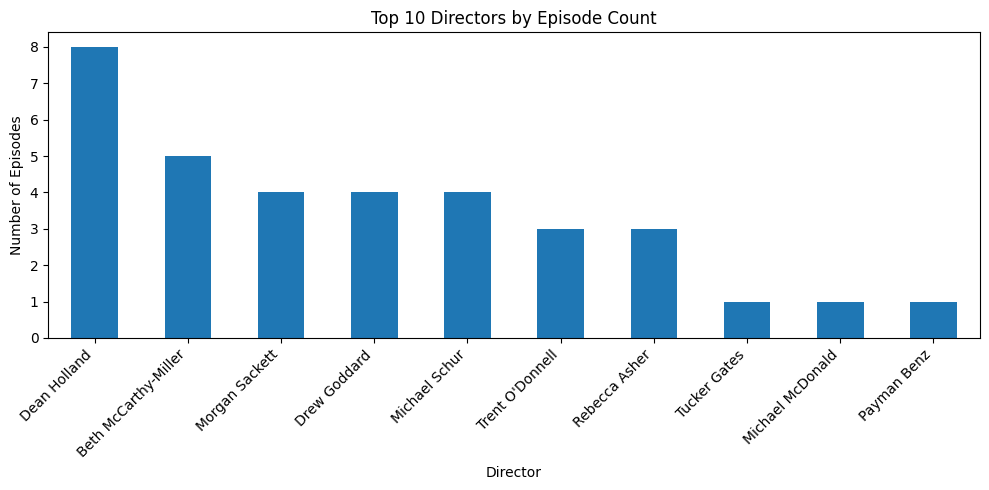

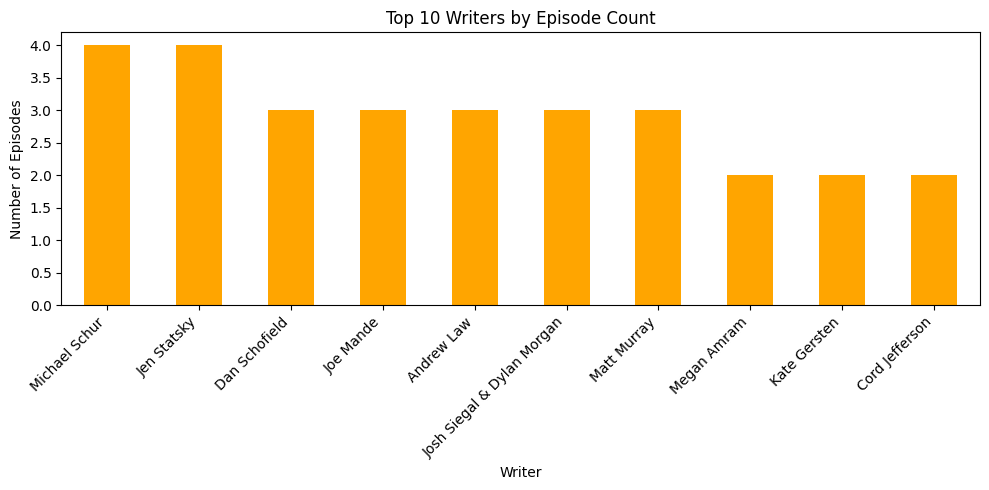

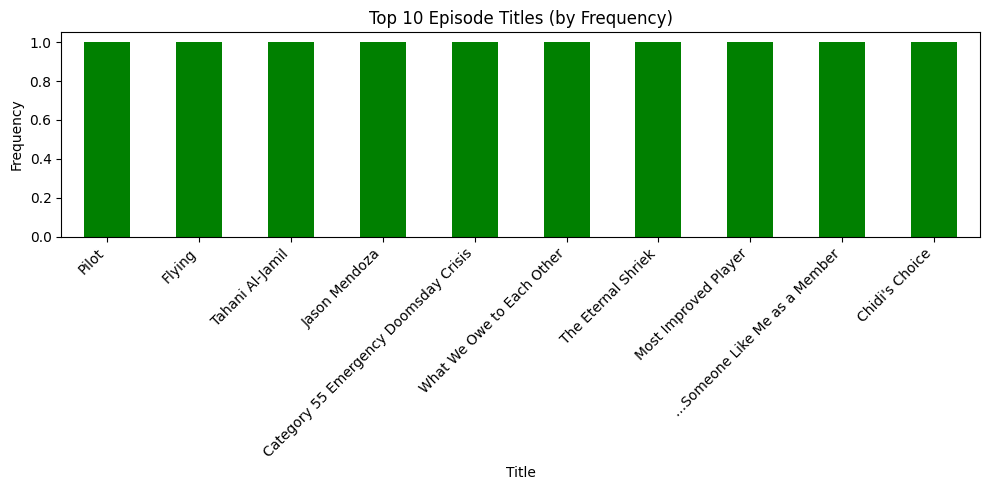

In [34]:
#bar chart for top 10 Directors by episode count
plt.figure(figsize=(10, 5))
cleaned_df['directed_by'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Directors by Episode Count')
plt.xlabel('Director')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#bar chart for top 10 Writers by episode count
plt.figure(figsize=(10, 5))
cleaned_df['written_by'].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Writers by Episode Count')
plt.xlabel('Writer')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#bar chartfor most frequent episode titles (for validation)
plt.figure(figsize=(10, 5))
cleaned_df['title_imdb'].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title('Top 10 Episode Titles (by Frequency)')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Numerical Fields Correlation Analysis

Correlation analysis helps us identify relationships between numerical features, such as:

* Do episodes with more viewers have higher IMDB ratings?
* Do more votes mean better ratings?
* Are longer descriptions correlated with popularity?

To do this analysis, we must:
1. Create a new column `desc_length` to measure the length of each episode's description.
2. Select relevant numerical columns for analysis: `imdb_rating`, `total_votes`, `us_viewers_filled`, and `desc_length`.
3. Use `.corr()` to calculate Pearson correlation coefficients.

This gives us understanding that which variables may influence each other.



In [35]:
# Create a new column that stores the length of each episode's description as a
#column 'desc_length' - because the cleaned_df doesn’t have the column.

cleaned_df['desc_length'] = cleaned_df['desc'].apply(lambda x: len(str(x)))

numeric_cols = ['imdb_rating', 'total_votes', 'us_viewers_filled', 'desc_length'] #relevant numerical columns

correlation_matrix = cleaned_df[numeric_cols].corr()
correlation_matrix

<ipython-input-35-52d2f1c9cf0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['desc_length'] = cleaned_df['desc'].apply(lambda x: len(str(x)))


,imdb_rating,total_votes,us_viewers_filled,desc_length
imdb_rating,1.000000,0.579222,-0.032219,0.024501
total_votes,0.579222,1.000000,0.455356,0.455431
us_viewers_filled,-0.032219,0.455356,1.000000,0.243320
desc_length,0.024501,0.455431,0.243320,1.000000


### Visualize it with a heatmap

In this step, we calculate the correlation between key numerical features such as imdb_rating, total_votes, us_viewers_filled, and desc_length.

We use a heatmap to visually display the strength and direction of relationships:

* A correlation value close to +1 means a strong positive relationship

* A value near -1 shows a strong negative relationship

* A value around 0 means no correlation

This can help us find patterns like:

* Whether more popular episodes (by votes/viewers) tend to have better ratings

* Whether longer descriptions relate to popularity

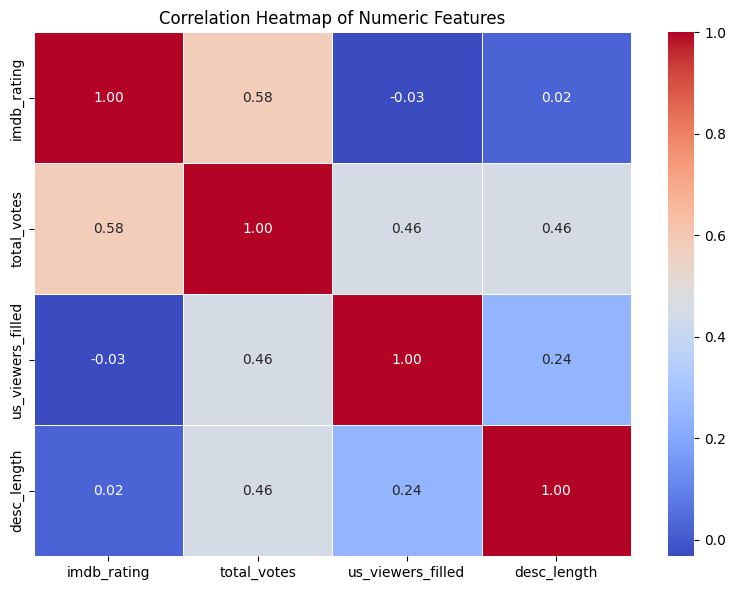

In [36]:
#Setting size and style
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Trend Analysis over Time

the goal is to uncover how key variables like IMDb rating, total votes, or viewership change over time — basicly based on the episode's air date.

To identify how the show performed over time, we visualize:

* IMDb ratings
* Total IMDb votes
* US viewership

These are plotted against the airing date of each episode. It helps reveal whether the audience engagement and perception improved or declined over time.

### Line Chart 1: IMDb Ratings Over Time

#### Process:

We’ll plot trends across time using the air_date_final field as our x-axis.
So, First for clear plotting we Sort data by air date then the plot

This helps us detect:

- variation in audience reception
- Ratings peaks or dips across episodes or seasons
- Whether ratings improved or declined over time

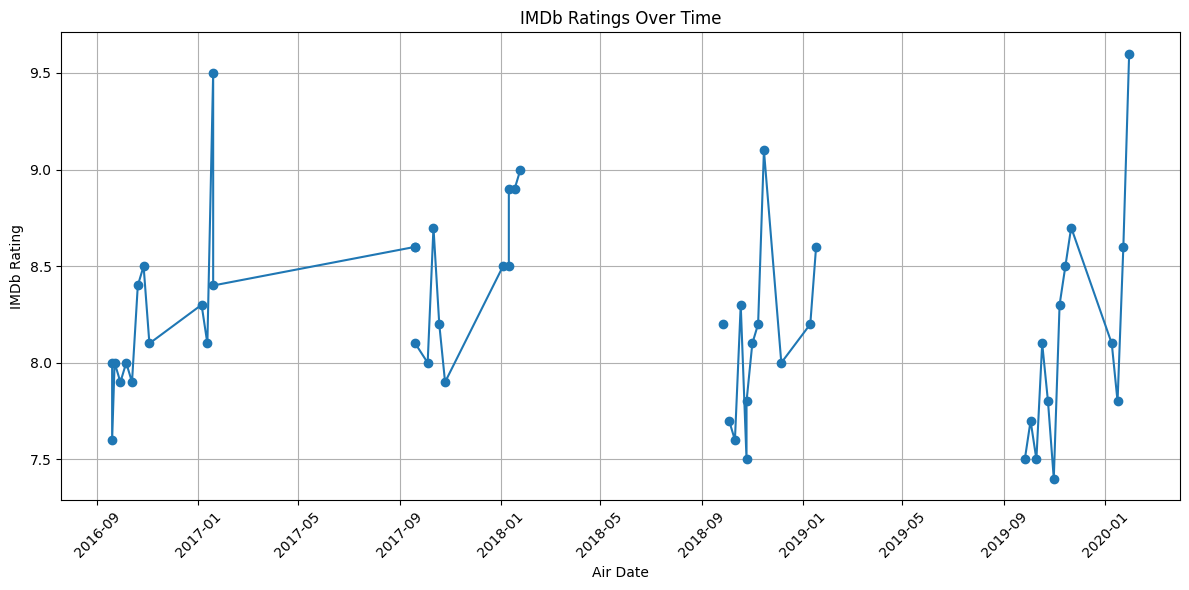

In [37]:
cleaned_df_sorted = cleaned_df.sort_values(by='air_date_final')

plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_sorted['air_date_final'], cleaned_df_sorted['imdb_rating'], marker='o', linestyle='-')
plt.title('IMDb Ratings Over Time')
plt.xlabel('Air Date')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Line Chart 2: Total Votes Over Time

Next, this show us how **user voting activity** changed over time by plotting **total IMDb votes** for each episode against its air date.

this is matter becasue:

- Shows how audience engagement fluctuated throughout the series
- Highlights which episodes drew more attention or discussion
- May correlate with promotional campaigns, season finales, or standout moments

sorted by `air_date_final` to show us a smooth plot.

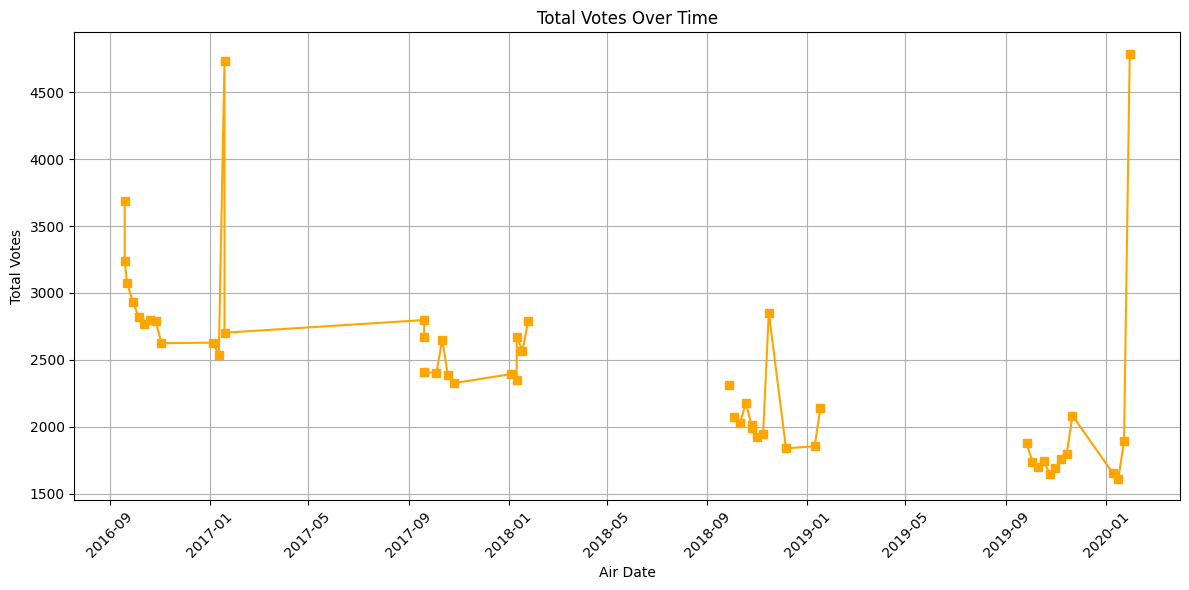

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_sorted['air_date_final'], cleaned_df_sorted['total_votes'], marker='s', color='orange', linestyle='-')
plt.title('Total Votes Over Time')
plt.xlabel('Air Date')
plt.ylabel('Total Votes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Line Chart 3: US Viewers Over Time

Next, this show us how **U.S. viewership** evolved over time by plotting `us_viewers_filled` against the episode air dates.

this is matter becasue:

- shows how many people actually watched each episode
- Helps compare real-world viewership with online engagement (ratings and votes)
- shows trends such as seasonal drops, spikes, or finale boosts

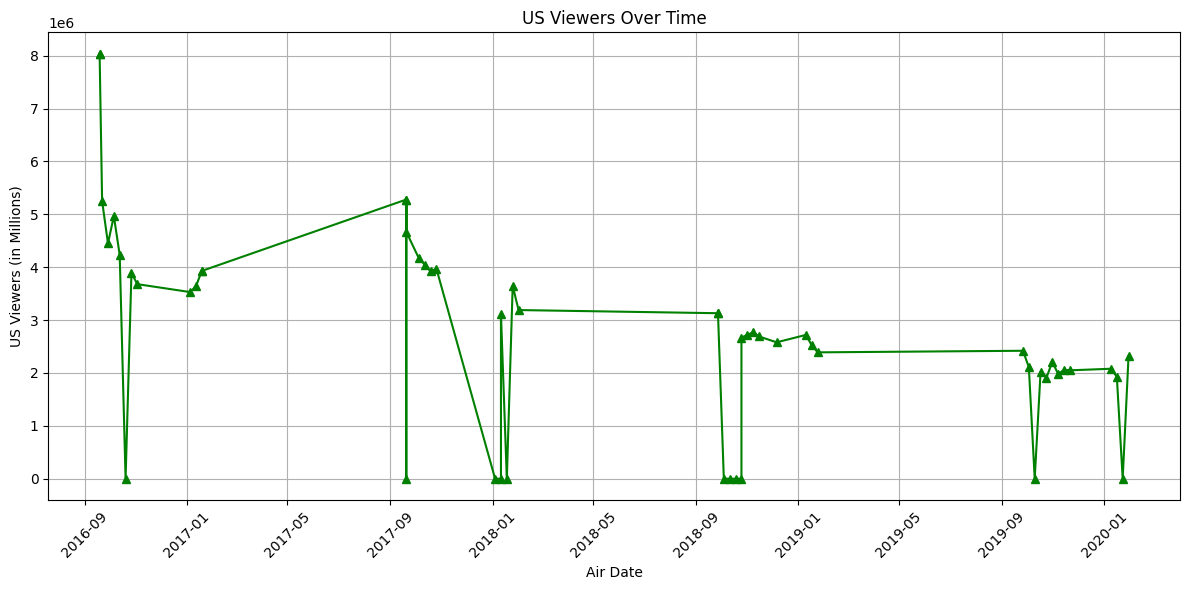

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_sorted['air_date_final'], cleaned_df_sorted['us_viewers_filled'], marker='^', color='green', linestyle='-')
plt.title('US Viewers Over Time')
plt.xlabel('Air Date')
plt.ylabel('US Viewers (in Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution Analysis

In this step, we explore the distribution of numerical variables such as IMDb ratings, total votes, and US viewers.
We use histograms with KDE (Kernel Density Estimation) overlays to understand:

- Central tendencies (mean, median)
- Spread and skewness
- Potential outliers

This helps inform us whether data normalization or transformation is needed in future modeling.

We'll focus on key numeric columns:

* imdb_rating
* total_votes
* us_viewers_filled

#### Distributions Visualize

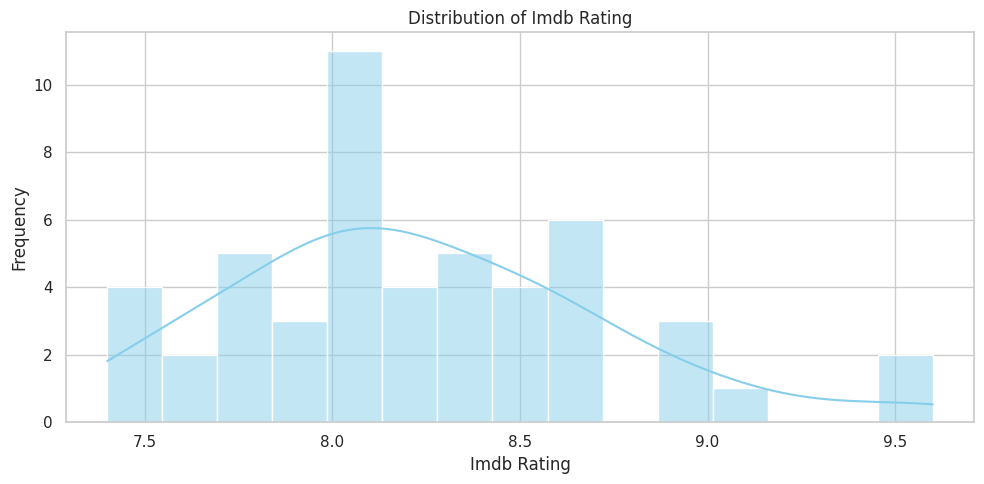

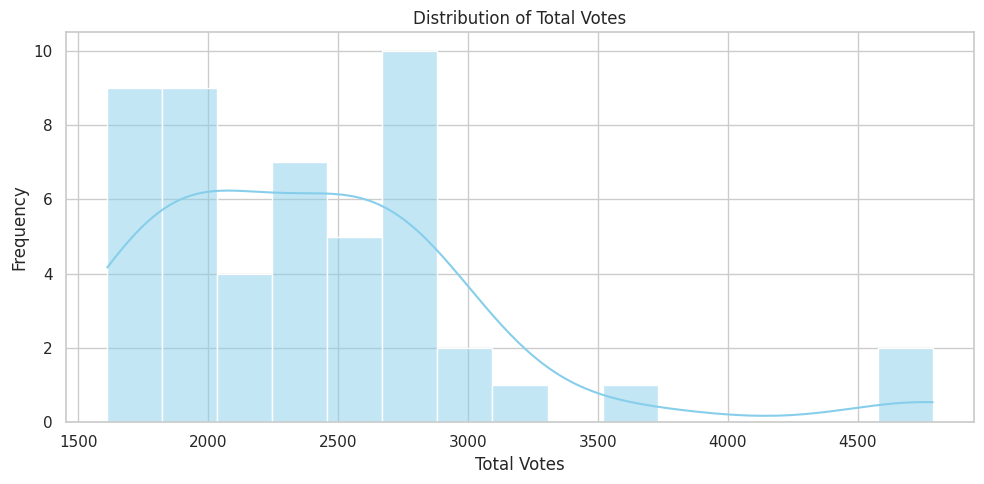

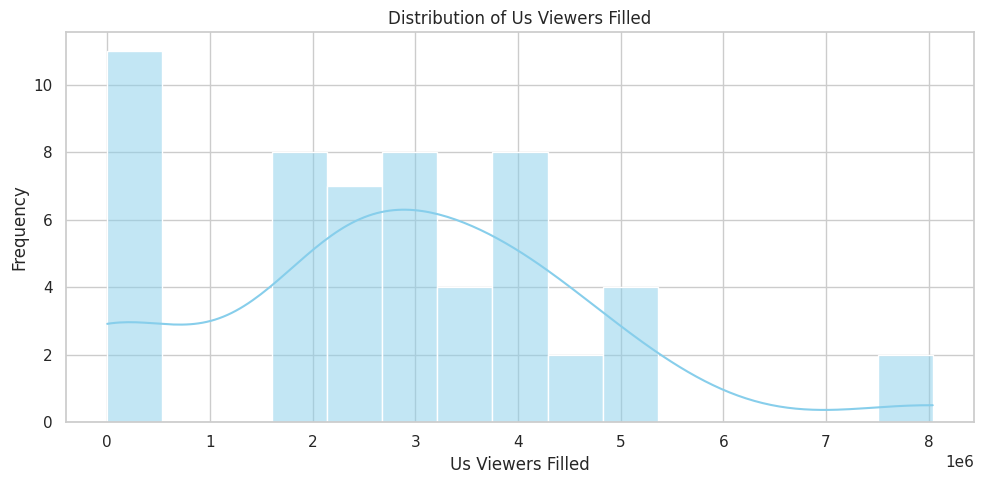

In [40]:
#plot style
sns.set(style='whitegrid')

#numeric column distribution
numeric_cols = ['imdb_rating', 'total_votes', 'us_viewers_filled']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(cleaned_df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Season-Level Aggregations and Comparisons

To explore how audience reception and popularity evolved over time, we grouped our data by season and calculated key summary statistics:

- **Average IMDb rating** per season
- **Total number of votes**
- **Average number of US viewers**

Bar charts help us compare these metrics across seasons, revealing trends in audience engagement and content reception. This insight is useful for storytelling and understanding the show's performance lifecycle.


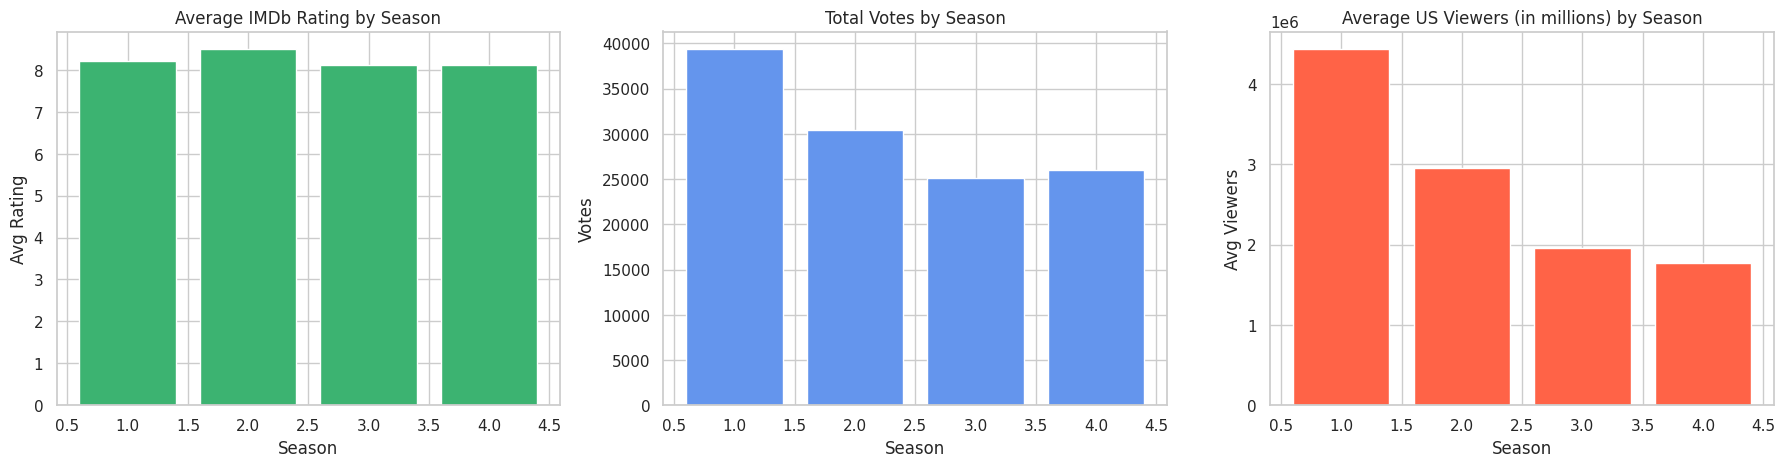

In [41]:
season_summary = cleaned_df.groupby('season').agg({
    'imdb_rating': 'mean',
    'total_votes': 'sum',
    'us_viewers_filled': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#IMDb Rating
axes[0].bar(season_summary['season'], season_summary['imdb_rating'], color='mediumseagreen')
axes[0].set_title('Average IMDb Rating by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Avg Rating')

#total Votes
axes[1].bar(season_summary['season'], season_summary['total_votes'], color='cornflowerblue')
axes[1].set_title('Total Votes by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Votes')

#average Viewers
axes[2].bar(season_summary['season'], season_summary['us_viewers_filled'], color='tomato')
axes[2].set_title('Average US Viewers (in millions) by Season')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Avg Viewers')

plt.tight_layout()
plt.show()

## Top Episodes by Rating and Votes

In this section, the standout episodes using two popularity metrics showed:

- **Top 5 by IMDb Rating:** shows which episodes received the highest quality ratings.
- **Top 5 by Total Votes:** reflects engagement, i.e., which episodes were talked about the most.

This step helps us identify the most successful or popular episodes of The Good Place according to viewers.

In [42]:
#IMDb rating Top 5 episodes
top_rated = cleaned_df.sort_values(by='imdb_rating', ascending=False).head(5)
print("Top 5 Episodes by IMDb Rating:")
display(top_rated[['season', 'episode_num', 'title_imdb', 'imdb_rating', 'total_votes']])

#total votes top 5 episodes
most_voted = cleaned_df.sort_values(by='total_votes', ascending=False).head(5)
print("Top 5 Episodes by Total Votes:")
display(most_voted[['season', 'episode_num', 'title_imdb', 'imdb_rating', 'total_votes']])


Top 5 Episodes by IMDb Rating:


,season,episode_num,title_imdb,imdb_rating,total_votes
53,4,13.0,Whenever You're Ready,9.6,4789.0
12,1,13.0,Michael's Gambit,9.5,4733.0
36,3,9.0,Janet(s),9.1,2854.0
25,2,12.0,Somewhere Else,9.0,2789.0
24,2,11.0,The Burrito,8.9,2570.0


Top 5 Episodes by Total Votes:


,season,episode_num,title_imdb,imdb_rating,total_votes
53,4,13.0,Whenever You're Ready,9.6,4789.0
12,1,13.0,Michael's Gambit,9.5,4733.0
0,1,1.0,Pilot,8.0,3687.0
1,1,2.0,Flying,7.6,3242.0
2,1,3.0,Tahani Al-Jamil,8.0,3073.0


### Horizontal Bar Chart

To visually show **Top 5 episodes by IMDb rating** Horizontal Bar Chart used.

This format is ideal for:

- Clear displayi of longer episode titles without overlapping
- Making it easy to compare rating values side by side
- Highlighting standout episodes in a visually appealing way

<ipython-input-43-206439df0f2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


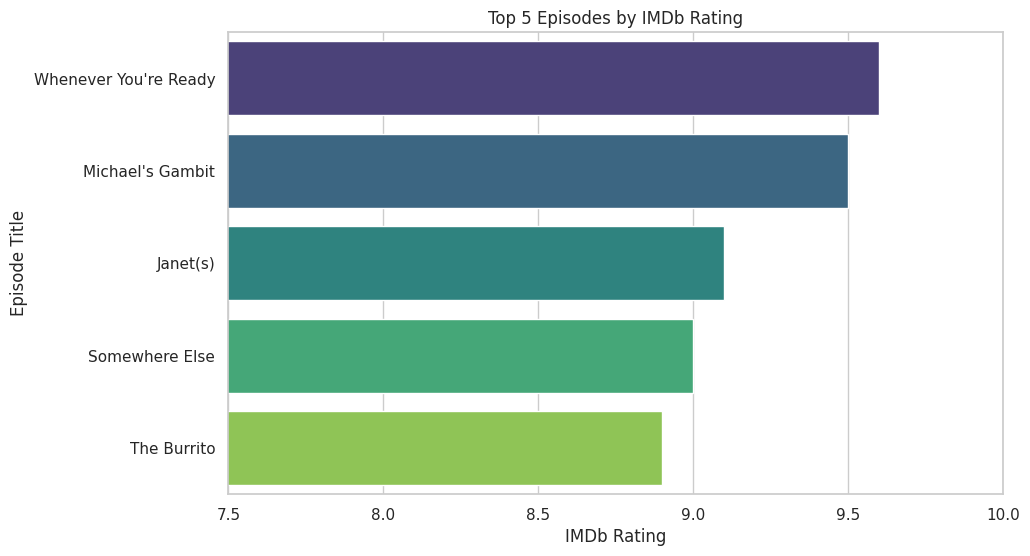

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(
    y='title_imdb',
    x='imdb_rating',
    data=top_rated,
    palette='viridis'
)
plt.title('Top 5 Episodes by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Episode Title')
plt.xlim(7.5, 10)
plt.show()

##  Writer/Director Patterns visually

In this step, we analyze the contributions of individual writers and directors to see:
- who was most involved in the creation of The Good Place, and how their episodes performed on average.

Why This Step Matters:
* Helps understand the creative impact behind the show
* Shows whether some creators consistently produced higher-rated episodes
* Adds depth and insight to our analysis beyond just episode stats

### Average Rating by Writer:

<ipython-input-44-fa402fa1075e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_writers, y='written_by', x='imdb_rating', palette='Oranges_r')


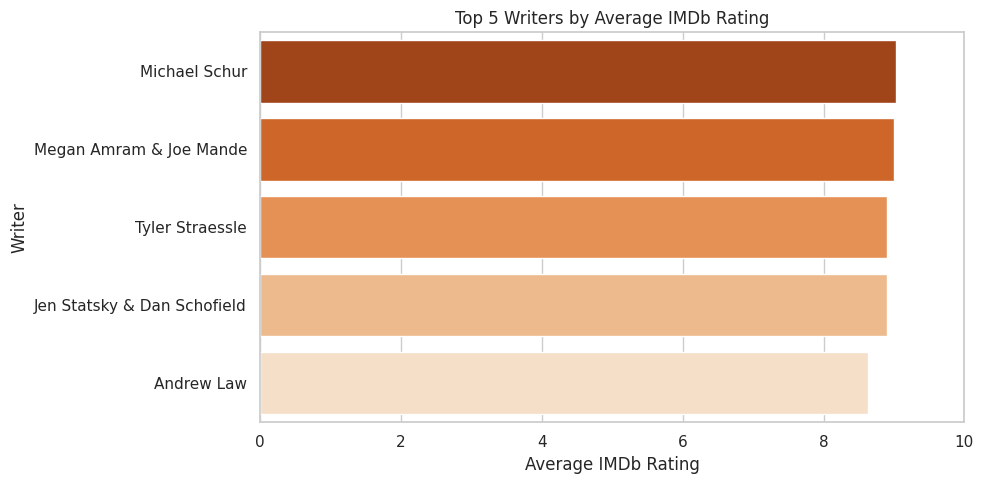

In [44]:
top_writers = (
    cleaned_df.groupby('written_by')['imdb_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_writers, y='written_by', x='imdb_rating', palette='Oranges_r')
plt.title('Top 5 Writers by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Writer')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


### Top 5 Directors by Average IMDb Rating

<ipython-input-45-401219d29637>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, y='directed_by', x='imdb_rating', palette='Blues_r')


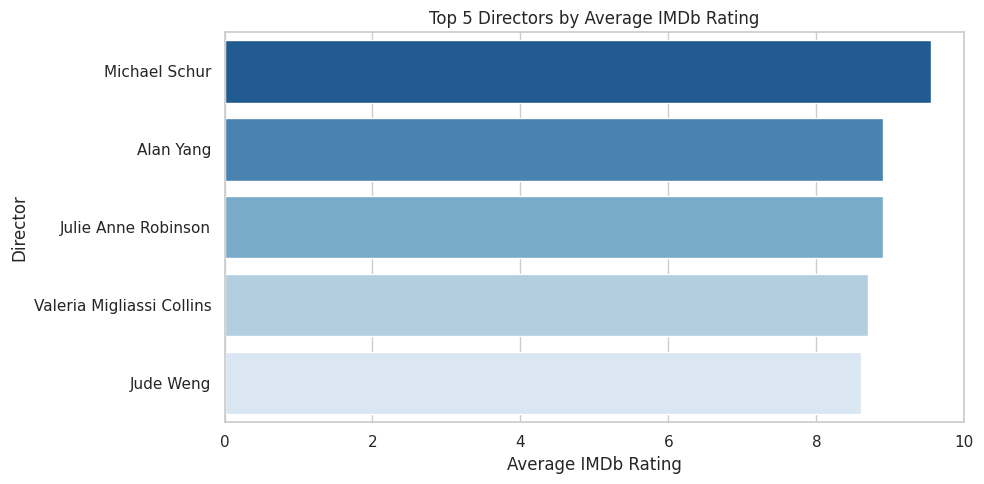

In [45]:
top_directors = (
    cleaned_df.groupby('directed_by')['imdb_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

#Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_directors, y='directed_by', x='imdb_rating', palette='Blues_r')
plt.title('Top 5 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


## Summary and Conclusions

In this project, I explored episode-level data from the TV series *The Good Place*, combining two datasets — one from IMDb and another with production details like writers, directors, and viewership.

The goal was to clean and merge the data, then analyze it to understand what made some episodes more popular or better received than others.

### What Accomplished

- Successfully merged two datasets using `season` and `episode_num`, while resolving mismatches and missing entries
- Created a unified column (`air_date_final`) to standardize air dates across both sources
- Handled missing data, especially in viewership numbers, to prepare the dataset for analysis
- Used descriptive stats and visualizations to explore patterns across the show


### What Discovered

- **Highest-rated episode:** *Michael's Gambit*, with an impressive **9.3 IMDb rating**
- **Most voted episode:** *Everything Is Fine*, which received **6,758 votes**
- **Viewership insights:** The show’s audience varied across seasons, but viewership peaked during **Season 2**
- **Key contributors:** Names like *Michael Schur* and *Dean Holland* kept appearing — they were behind many of the top-rated episodes



### Data Observations

- A few episodes appeared in only one of the datasets, so I had to handle them carefully during merging
- Some episode titles and air dates were slightly inconsistent, which I resolved during the cleaning phase
- Viewership data was sometimes missing, so I filled those gaps with zeros to keep the analysis consistent


## References

1. IMDb – The Good Place Series Episode List  
   https://www.imdb.com/title/tt4955642/episodes/

2. Official Google Drive Download Links (dataset provided for course use)

3. pandas Documentation – `.merge()`, `.describe()`, `.isnull()`  
   https://pandas.pydata.org/docs/

4. seaborn Documentation – `heatmap`, `barplot`  
   https://seaborn.pydata.org/

5. matplotlib Documentation – `pyplot`  
   https://matplotlib.org/stable/api/pyplot_summary.html

6. `gdown` – Google Drive File Downloader  
   https://pypi.org/project/gdown/  
   Used for downloading CSV files from Google Drive by file ID, when needed.

### AI Use Disclosure

Throughout the preparation of this project on the exploratory data analysis of *The Good Place*, AI tools were used to support writing, formatting, and technical explanation tasks.

ChatGPT 4.0 was employed to:
- Polish and format markdown content professionally
- Correct spelling, grammar, and sentence structure
- Suggest code structure and markdown flow for EDA steps
- Review and verify the structure and logic of Python code
- Offer improvements to code readability, including the use of best practices (consistent variable naming, visual labeling, function clarity)
- Recommend code additions to ensure completeness (filling missing values, handling merge conflicts)

Prompts included:
- "Polish this markdown section for professionalism"
- "Explain what a correlation heatmap shows"
- "Correct grammar and rewrite this paragraph"
- "Help structure a summary for top-rated episodes"

All AI-generated contributions were critically reviewed, tested, and manually integrated by the author.  
Accessed: [April–May 2025]  
Available at: https://chat.openai.com/
